In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import PdM_functions as pdm # custom functions created for this project that are used in several notebooks

In [2]:
# Load the radiator flow data
df_set_train = pd.read_csv('data/Space Shuttle/shuttle.trn', sep = " ", header=None).drop(0, axis = 1)
df_set_test = pd.read_csv('data/Space Shuttle/shuttle.tst', sep = " ", header=None).drop(0, axis = 1)
df_set_train['timestamp'] = list(range(1, len(df_set_train) + 1, 1))
df_set_test['timestamp'] = list(range(len(df_set_train) + 1, (len(df_set_train) +len(df_set_test) + 1), 1))

In [3]:
print(df_set_train)
print(df_set_test)

        1    2  3   4   5   6   7   8  9  timestamp
0      21   77  0  28   0  27  48  22  2          1
1       0   92  0   0  26  36  92  56  4          2
2       0   82  0  52  -5  29  30   2  1          3
3       0   76  0  28  18  40  48   8  1          4
4       0   79  0  34 -26  43  46   2  1          5
...    ..  ... ..  ..  ..  ..  ..  .. ..        ...
43495   5   78  0  46   5  32  32   0  1      43496
43496   0   79 -1  10   3  43  69  26  1      43497
43497   0   78  3  46   0  30  32   2  1      43498
43498   0   79  0  38 -25  38  40   2  1      43499
43499  -3  100  0  38   0  61  62   2  1      43500

[43500 rows x 10 columns]
       1    2  3   4   5   6    7    8  9  timestamp
0      0   81  0  -6  11  25   88   64  4      43501
1      0   96  0  52  -4  40   44    4  4      43502
2     -1   89 -7  50   0  39   40    2  1      43503
3      9   79  0  42  -2  25   37   12  4      43504
4      2   82  0  54  -6  26   28    2  1      43505
...   ..  ... ..  ..  ..  ..  .

In [4]:
new_column_names = {
    0: 'timestamp',
    1: 'rad01',
    2: 'rad02',
    3: 'rad03',
    4: 'rad04',
    5: 'rad05',
    6: 'rad06',
    7: 'rad07',
    8: 'rad08',
    9: 'state'
    }

In [5]:
df_set_train.rename(columns = new_column_names, inplace = True)
df_set_test.rename(columns = new_column_names, inplace = True)

In [6]:
state_map = {
    1: 'Rad Flow',
    2: 'Fpv Close',
    3: 'Fpv Open',
    4: 'High',
    5: 'Bypass',
    6: 'Bpv Close',
    7: 'Bpv Open'
    }

In [7]:
df_set_train['state'].unique()

array([2, 4, 1, 5, 3, 7, 6])

In [8]:
df_set_test['state'].unique()

array([4, 1, 5, 3, 2, 7, 6])

In [9]:
state_map_an = {
    1: 'Normal',
    2: 'Anomaly',
    3: 'Anomaly',
    4: 'Anomaly',
    5: 'Anomaly',
    6: 'Anomaly',
    7: 'Anomaly'
    }

In [10]:
df_set_train['state'] = df_set_train['state'].map(state_map_an)
df_set_test['state'] = df_set_test['state'].map(state_map_an)

In [11]:
len(df_set_train.loc[df_set_train['state'] == 'Normal',:])

34108

In [12]:
all_rows = len(df_set_train['state'])
norm_count = len(df_set_train.loc[df_set_train['state'] == 'Normal',:])
print('Normal fraction:', round(norm_count / all_rows, 2))

Normal fraction: 0.78


In [13]:
print(df_set_train)
print(df_set_test)

       rad01  rad02  rad03  rad04  rad05  rad06  rad07  rad08    state  \
0         21     77      0     28      0     27     48     22  Anomaly   
1          0     92      0      0     26     36     92     56  Anomaly   
2          0     82      0     52     -5     29     30      2   Normal   
3          0     76      0     28     18     40     48      8   Normal   
4          0     79      0     34    -26     43     46      2   Normal   
...      ...    ...    ...    ...    ...    ...    ...    ...      ...   
43495      5     78      0     46      5     32     32      0   Normal   
43496      0     79     -1     10      3     43     69     26   Normal   
43497      0     78      3     46      0     30     32      2   Normal   
43498      0     79      0     38    -25     38     40      2   Normal   
43499     -3    100      0     38      0     61     62      2   Normal   

       timestamp  
0              1  
1              2  
2              3  
3              4  
4              5

In [14]:
df_set_train.describe()

,rad01,rad02,rad03,rad04,rad05,rad06,rad07,rad08,timestamp
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,21750.500000
std,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,12557.512692
min,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,10875.750000
50%,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,21750.500000
75%,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,32625.250000
max,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,43500.000000


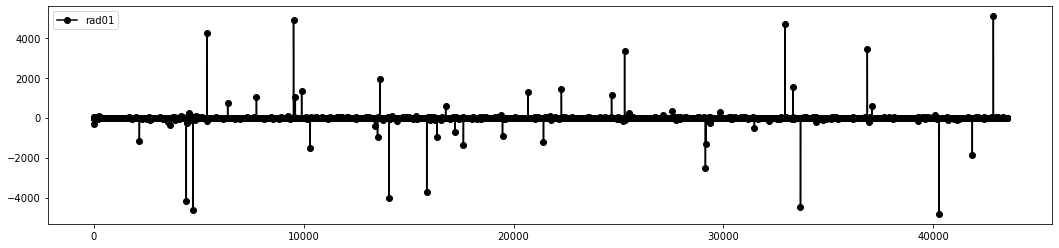

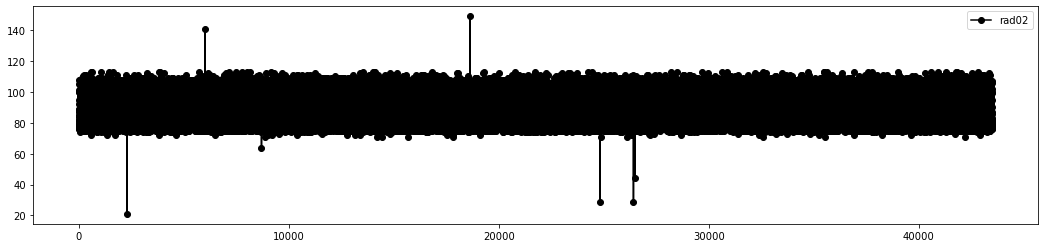

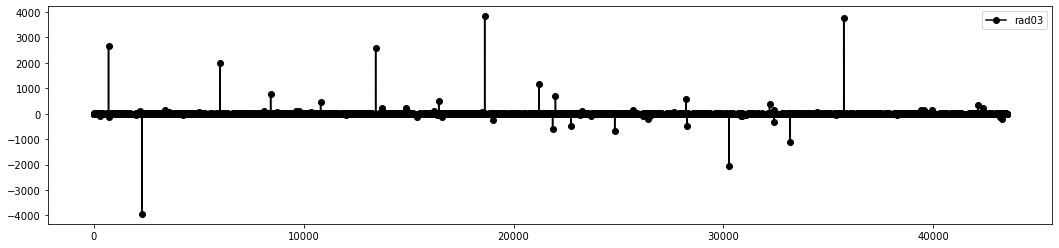

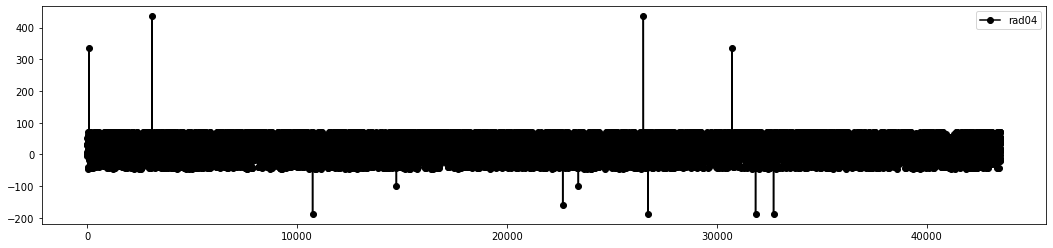

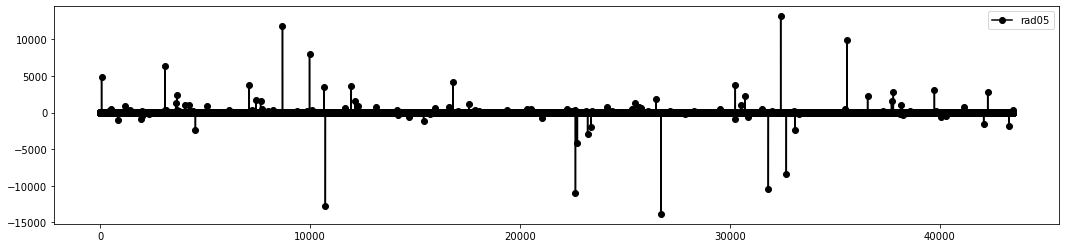

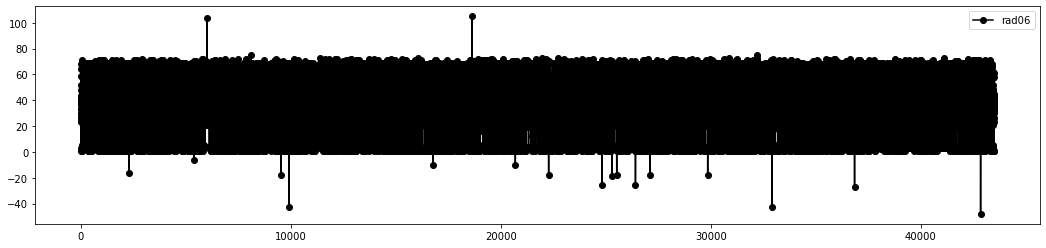

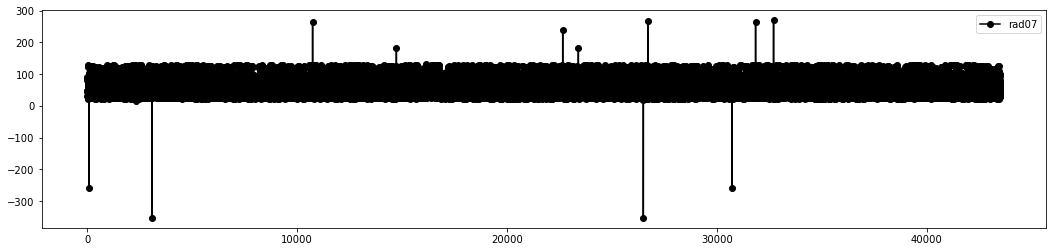

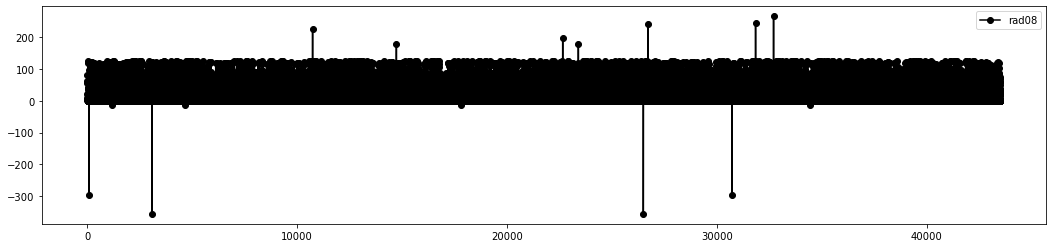

In [15]:
# Check the results of cleaning
#plot_chans = ['volt', 'rotate', 'pressure', 'vibration', 'errorID', 'failure', 'maintenance']
for sen in df_set_train.columns[:-2]:
    df_set_train[[sen]].plot(figsize = (18, 4), color = 'black', marker = 'o')

### Data Scaling

In [16]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import gridspec
from matplotlib.pyplot import figure
from itertools import groupby

In [17]:
df_set_train['state'].unique()

array(['Anomaly', 'Normal'], dtype=object)

In [18]:
df_set_train

,rad01,rad02,rad03,rad04,rad05,rad06,rad07,rad08,state,timestamp
0,21,77,0,28,0,27,48,22,Anomaly,1
1,0,92,0,0,26,36,92,56,Anomaly,2
2,0,82,0,52,-5,29,30,2,Normal,3
3,0,76,0,28,18,40,48,8,Normal,4
4,0,79,0,34,-26,43,46,2,Normal,5
...,...,...,...,...,...,...,...,...,...,...
43495,5,78,0,46,5,32,32,0,Normal,43496
43496,0,79,-1,10,3,43,69,26,Normal,43497
43497,0,78,3,46,0,30,32,2,Normal,43498
43498,0,79,0,38,-25,38,40,2,Normal,43499


In [19]:
# Scale the data (between 0 and 1)
drops = ['timestamp', 'state']
df_num_train = df_set_train.drop(drops, axis = 1)
scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.RobustScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_num_train), columns = df_num_train.columns, index = df_num_train.index)
df_train_scaled['timestamp'] = df_set_train['timestamp']
df_train_scaled['state'] = df_set_train['state']
df_train_scaled.describe()

,rad01,rad02,rad03,rad04,rad05,rad06,rad07,rad08,timestamp
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,0.487146,0.502668,0.507049,0.356617,0.512851,0.556043,0.648314,0.594798,21750.500000
std,0.007896,0.069598,0.005278,0.034781,0.006651,0.085853,0.034451,0.041235,12557.512692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.487167,0.453125,0.507015,0.342949,0.512617,0.516340,0.626003,0.572347,10875.750000
50%,0.487167,0.484375,0.507015,0.368590,0.512802,0.568627,0.637239,0.575563,21750.500000
75%,0.487167,0.531250,0.507015,0.375000,0.512988,0.588235,0.662921,0.594855,32625.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43500.000000


In [20]:
df_num_test = df_set_test.drop(drops, axis = 1)
df_test_scaled = pd.DataFrame(scaler.transform(df_num_test), columns = df_num_test.columns, index = df_num_test.index)
df_test_scaled['timestamp'] = df_set_test['timestamp']
df_test_scaled['state'] = df_set_test['state']
df_test_scaled.describe()

,rad01,rad02,rad03,rad04,rad05,rad06,rad07,rad08,timestamp
count,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000
mean,0.487221,0.502905,0.507047,0.356752,0.512897,0.556507,0.648216,0.594591,50750.500000
std,0.007821,0.069418,0.002197,0.034504,0.011285,0.085223,0.034161,0.041015,4185.933787
min,0.167745,0.148438,0.460420,0.227564,-0.478008,0.196078,0.260032,0.147910,43501.000000
25%,0.487167,0.453125,0.507015,0.346154,0.512654,0.522876,0.626003,0.572347,47125.750000
50%,0.487167,0.484375,0.507015,0.368590,0.512802,0.568627,0.635634,0.575563,50750.500000
75%,0.487167,0.531250,0.507015,0.375000,0.513025,0.588235,0.662921,0.594855,54375.250000
max,0.941997,0.757812,0.732398,0.798077,1.074703,0.790850,0.776886,0.774920,58000.000000


In [21]:
# Create map to reduce categories to two
# We want to remove 'recovering' so combine it with 'broken'
condition_map = {'Normal': 'Normal', 'Anomaly': 'Anomaly'}

In [22]:
df_train_scaled.head(10)

,rad01,rad02,rad03,rad04,rad05,rad06,rad07,rad08,timestamp,state
0,0.489289,0.437500,0.507015,0.346154,0.512802,0.490196,0.643660,0.607717,1,Anomaly
1,0.487167,0.554688,0.507015,0.301282,0.513766,0.549020,0.714286,0.662379,2,Anomaly
2,0.487167,0.476562,0.507015,0.384615,0.512617,0.503268,0.614767,0.575563,3,Normal
3,0.487167,0.429688,0.507015,0.346154,0.513469,0.575163,0.643660,0.585209,4,Normal
4,0.487167,0.453125,0.507015,0.355769,0.511839,0.594771,0.640449,0.575563,5,Normal
5,0.487167,0.523438,0.506500,0.310897,0.512840,0.333333,0.699839,0.700965,6,Anomaly
6,0.487167,0.468750,0.507015,0.294872,0.513210,0.477124,0.704655,0.672026,7,Anomaly
7,0.487065,0.578125,0.506629,0.387821,0.512654,0.575163,0.632424,0.575563,8,Normal
8,0.487975,0.437500,0.507015,0.346154,0.512802,0.464052,0.643660,0.610932,9,Anomaly
9,0.487167,0.625000,0.506114,0.346154,0.512802,0.732026,0.683788,0.585209,10,Normal


In [23]:
# Use besploke function from pdm_functions
df_norm_train, df_abnorm_train = pdm.remove_segements(
    segment_vec = df_train_scaled['state'],
    mapping = condition_map,
    dat = df_train_scaled,
    trans_window = 0,
    keep = 'Normal'
)

Input segement categories:  ['Anomaly' 'Normal']
Categories after mapping:  ['Anomaly' 'Normal']
Run length encoding:  [('Anomaly', 2), ('Normal', 3), ('Anomaly', 2), ('Normal', 1), ('Anomaly', 1), ('Normal', 12), ('Anomaly', 1), ('Normal', 4), ('Anomaly', 1), ('Normal', 5), ('Anomaly', 1), ('Normal', 3), ('Anomaly', 1), ('Normal', 5), ('Anomaly', 1), ('Normal', 1), ('Anomaly', 1), ('Normal', 3), ('Anomaly', 1), ('Normal', 2), ('Anomaly', 1), ('Normal', 6), ('Anomaly', 2), ('Normal', 4), ('Anomaly', 2), ('Normal', 9), ('Anomaly', 1), ('Normal', 2), ('Anomaly', 1), ('Normal', 18), ('Anomaly', 1), ('Normal', 4), ('Anomaly', 1), ('Normal', 5), ('Anomaly', 1), ('Normal', 1), ('Anomaly', 1), ('Normal', 1), ('Anomaly', 1), ('Normal', 2), ('Anomaly', 2), ('Normal', 1), ('Anomaly', 1), ('Normal', 12), ('Anomaly', 1), ('Normal', 19), ('Anomaly', 1), ('Normal', 4), ('Anomaly', 1), ('Normal', 5), ('Anomaly', 1), ('Normal', 8), ('Anomaly', 1), ('Normal', 2), ('Anomaly', 1), ('Normal', 1), ('Anomal

>
Remove rows:  [0, 1]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5, 6]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8, 8]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21, 21]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26, 26]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32, 32]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36, 36]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42, 42]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [44, 44]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [48, 48]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [51, 51]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [58, 59]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [64, 65]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7

>
Skipping Normal segment(s)...
>
Remove rows:  [1032, 1032]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1036, 1038]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1044, 1044]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1047, 1047]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1052, 1052]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1057, 1058]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1061, 1062]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1065, 1065]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1069, 1069]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1099, 1100]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1105, 1105]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1108, 1108]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [1960, 1960]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1964, 1964]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1966, 1966]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1975, 1976]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2000, 2000]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2006, 2007]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2010, 2010]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2013, 2013]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2016, 2016]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2020, 2021]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2025, 2025]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2028, 2028]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [2852, 2852]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2855, 2855]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2857, 2857]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2865, 2865]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2869, 2869]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2872, 2872]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2876, 2876]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2878, 2878]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2885, 2885]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2889, 2889]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2891, 2891]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2894, 2894]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [3728, 3728]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3730, 3730]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3742, 3743]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3745, 3746]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3748, 3748]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3752, 3752]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3758, 3758]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3767, 3767]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3769, 3769]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3780, 3780]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3782, 3782]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3796, 3796]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [4567, 4567]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4570, 4570]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4574, 4574]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4576, 4576]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4583, 4583]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4589, 4589]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4595, 4595]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4601, 4601]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4604, 4605]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4614, 4616]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4625, 4625]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4637, 4638]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [5496, 5497]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5501, 5502]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5510, 5511]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5516, 5516]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5523, 5523]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5532, 5532]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5536, 5536]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5538, 5538]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5540, 5540]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5547, 5547]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5549, 5549]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5551, 5551]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [6436, 6437]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6441, 6441]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6447, 6447]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6451, 6452]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6457, 6457]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6460, 6460]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6465, 6465]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6480, 6480]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6497, 6497]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6499, 6501]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6504, 6504]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6510, 6510]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [7395, 7395]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7403, 7403]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7419, 7419]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7425, 7425]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7432, 7432]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7446, 7448]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7461, 7461]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7463, 7463]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7465, 7465]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7470, 7470]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7473, 7473]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7476, 7476]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [8340, 8340]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8346, 8346]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8352, 8352]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8354, 8354]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8356, 8356]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8358, 8359]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8363, 8363]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8369, 8370]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8381, 8381]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8384, 8385]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8387, 8387]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8400, 8400]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [9210, 9211]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9213, 9213]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9215, 9216]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9221, 9222]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9226, 9226]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9235, 9235]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9243, 9243]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9251, 9251]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9254, 9254]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9266, 9266]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9268, 9269]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9273, 9273]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [9810, 9810]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9820, 9820]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9824, 9824]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9832, 9833]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9836, 9836]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9838, 9838]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9840, 9840]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9843, 9843]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9846, 9846]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9852, 9852]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9855, 9855]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9858, 9859]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [10687, 10689]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10691, 10692]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10710, 10710]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10713, 10713]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10719, 10719]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10722, 10722]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10725, 10725]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10729, 10729]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10736, 10736]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10742, 10742]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10744, 10744]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10756, 10756]
Removing 1 rows...
>
Skipping Norma

Skipping Normal segment(s)...
>
Remove rows:  [11731, 11731]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11745, 11745]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11762, 11762]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11769, 11769]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11771, 11771]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11774, 11774]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11777, 11777]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11779, 11780]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11782, 11782]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11785, 11785]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11798, 11798]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11803, 11804]
Removing 2 rows...
>
Skipping Normal 

>
Skipping Normal segment(s)...
>
Remove rows:  [12614, 12614]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12617, 12617]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12623, 12623]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12629, 12629]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12634, 12634]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12636, 12636]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12638, 12638]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12646, 12646]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12648, 12649]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12652, 12652]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12655, 12655]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12660, 12660]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [13456, 13456]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13467, 13467]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13470, 13470]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13472, 13472]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13482, 13482]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13485, 13485]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13493, 13493]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13502, 13502]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13507, 13508]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13517, 13518]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13520, 13520]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13522, 13523]
Removing 2 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [14533, 14533]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14535, 14535]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14537, 14537]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14547, 14547]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14554, 14554]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14561, 14561]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14572, 14572]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14587, 14587]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14592, 14592]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14595, 14595]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14601, 14601]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14606, 14606]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [15367, 15367]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15370, 15370]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15376, 15377]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15383, 15384]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15386, 15386]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15388, 15389]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15392, 15392]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15401, 15401]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15405, 15407]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15410, 15410]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15414, 15414]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [15418, 15418]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [16358, 16358]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16360, 16361]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16363, 16363]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16371, 16371]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16374, 16377]
Removing 4 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16381, 16381]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16385, 16385]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16387, 16387]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16396, 16396]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16408, 16408]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16411, 16411]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [16414, 16415]
Removing 2 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [17327, 17327]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17330, 17330]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17341, 17341]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17343, 17343]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17349, 17350]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17356, 17356]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17358, 17358]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17362, 17362]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17368, 17368]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17372, 17372]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17375, 17375]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [17378, 17378]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [18226, 18226]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18228, 18228]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18238, 18239]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18244, 18244]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18254, 18255]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18266, 18268]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18273, 18273]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18283, 18283]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18285, 18285]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18291, 18291]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18294, 18294]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [18304, 18304]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [19155, 19155]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19159, 19159]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19163, 19164]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19171, 19172]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19180, 19180]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19194, 19194]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19196, 19196]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19199, 19199]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19204, 19205]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19207, 19207]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19211, 19211]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [19223, 19223]
Removing 1 rows...
>
Skipping Norma

>
Remove rows:  [20085, 20085]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20089, 20089]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20094, 20094]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20106, 20109]
Removing 4 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20118, 20119]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20124, 20124]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20128, 20128]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20136, 20136]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20140, 20141]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20143, 20143]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20148, 20149]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [20152, 20153]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  

>
Skipping Normal segment(s)...
>
Remove rows:  [21007, 21007]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21009, 21009]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21012, 21012]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21016, 21016]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21020, 21020]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21030, 21030]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21037, 21037]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21042, 21043]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21048, 21048]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21061, 21061]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21065, 21065]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21067, 21067]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [21905, 21907]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21923, 21923]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21936, 21937]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21939, 21941]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21946, 21946]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21948, 21948]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21954, 21955]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21959, 21961]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21963, 21964]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21974, 21974]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21976, 21976]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [21982, 21982]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [22889, 22889]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22892, 22892]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22895, 22895]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22904, 22904]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22906, 22907]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22913, 22913]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22918, 22918]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22920, 22920]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22924, 22924]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22932, 22932]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22940, 22940]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [22946, 22948]
Removing 3 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [23809, 23809]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23815, 23815]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23832, 23832]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23835, 23835]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23838, 23838]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23840, 23841]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23847, 23847]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23864, 23864]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23866, 23866]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23870, 23870]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23873, 23873]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [23875, 23876]
Removing 2 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [24755, 24755]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24757, 24758]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24760, 24760]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24765, 24765]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24778, 24780]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24782, 24782]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24791, 24791]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24803, 24804]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24809, 24810]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24816, 24816]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24818, 24818]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [24823, 24823]
Removing 1 rows...
>
Skipping Norma

Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25633, 25633]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25635, 25635]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25637, 25637]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25641, 25641]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25648, 25648]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25651, 25651]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25654, 25654]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25658, 25659]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25666, 25666]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25670, 25670]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25680, 25680]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [25684, 25684]
Removing 1 rows.

>
Skipping Normal segment(s)...
>
Remove rows:  [26583, 26584]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26587, 26587]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26597, 26597]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26599, 26599]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26610, 26611]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26621, 26622]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26635, 26636]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26645, 26645]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26648, 26648]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26650, 26651]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26653, 26653]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [26658, 26658]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [27560, 27560]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27573, 27573]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27575, 27575]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27581, 27581]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27585, 27585]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27588, 27590]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27592, 27593]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27595, 27595]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27604, 27604]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27609, 27609]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27614, 27616]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [27622, 27623]
Removing 2 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [28443, 28444]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28446, 28446]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28469, 28469]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28473, 28473]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28485, 28486]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28489, 28489]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28492, 28492]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28503, 28503]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28509, 28510]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28515, 28515]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28517, 28518]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [28525, 28525]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [29442, 29442]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29447, 29447]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29466, 29466]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29473, 29473]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29477, 29477]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29486, 29486]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29490, 29490]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29493, 29493]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29496, 29496]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29498, 29498]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29500, 29500]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [29508, 29508]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [30369, 30369]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30371, 30371]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30376, 30376]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30379, 30380]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30382, 30382]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30391, 30392]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30396, 30398]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30406, 30406]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30411, 30412]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30420, 30420]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30424, 30424]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [30428, 30428]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [31339, 31339]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31358, 31358]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31367, 31367]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31370, 31370]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31372, 31372]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31377, 31377]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31384, 31384]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31389, 31389]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31393, 31394]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31397, 31397]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31401, 31402]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [31411, 31411]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [32218, 32218]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32222, 32224]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32233, 32234]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32236, 32236]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32241, 32241]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32247, 32248]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32254, 32254]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32259, 32260]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32266, 32266]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32273, 32273]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32278, 32278]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [32280, 32280]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [33199, 33200]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33203, 33203]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33217, 33218]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33222, 33222]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33224, 33224]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33227, 33229]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33231, 33231]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33238, 33238]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33242, 33243]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33247, 33247]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33249, 33250]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [33253, 33254]
Removing 2 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [34069, 34070]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34075, 34076]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34078, 34078]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34084, 34084]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34091, 34092]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34095, 34095]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34100, 34100]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34106, 34108]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34115, 34115]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34121, 34121]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34124, 34124]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [34130, 34130]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [35019, 35019]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35022, 35022]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35024, 35024]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35027, 35027]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35030, 35031]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35033, 35034]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35043, 35043]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35045, 35045]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35049, 35051]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35054, 35054]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35056, 35056]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35058, 35058]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [35975, 35975]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35977, 35977]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35979, 35980]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35982, 35982]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35991, 35991]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [35999, 35999]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36003, 36003]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36008, 36010]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36018, 36018]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36022, 36023]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36025, 36025]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36029, 36031]
Removing 3 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [36889, 36889]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36892, 36892]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36896, 36896]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36898, 36898]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36900, 36900]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36906, 36906]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36911, 36911]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36915, 36915]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36918, 36919]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36922, 36922]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36924, 36924]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [36927, 36927]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [37886, 37888]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37894, 37894]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37899, 37899]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37903, 37903]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37908, 37908]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37913, 37913]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37919, 37920]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37922, 37923]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37939, 37941]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37943, 37943]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37948, 37949]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [37956, 37956]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [38822, 38823]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38830, 38830]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38841, 38841]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38850, 38850]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38852, 38852]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38854, 38854]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38857, 38857]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38859, 38859]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38861, 38861]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38865, 38865]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38869, 38869]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [38877, 38877]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [39755, 39755]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39762, 39762]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39768, 39769]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39774, 39775]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39779, 39779]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39781, 39781]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39798, 39799]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39804, 39804]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39812, 39812]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39815, 39815]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39820, 39820]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [39839, 39840]
Removing 2 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [40666, 40666]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40671, 40671]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40673, 40673]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40675, 40676]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40680, 40681]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40689, 40689]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40691, 40692]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40698, 40699]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40709, 40709]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40713, 40713]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40715, 40715]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [40723, 40723]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [41654, 41655]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41658, 41658]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41660, 41660]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41666, 41666]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41670, 41670]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41673, 41673]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41675, 41675]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41680, 41680]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41702, 41702]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41717, 41717]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41726, 41726]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [41741, 41741]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [42601, 42602]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42614, 42614]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42617, 42618]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42621, 42621]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42635, 42635]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42637, 42637]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42642, 42642]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42650, 42650]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42657, 42657]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42659, 42659]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42661, 42661]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [42666, 42666]
Removing 1 rows...
>
Skipping Norma

In [24]:
# Check row counts
tot_rows = len(df_norm_train) + len(df_abnorm_train)
print('Nrows normal: ' + str(len(df_norm_train)) + ' (' + str(round(100*len(df_norm_train)/tot_rows)) + '%)')
print('Nrows abnorm: ' + str(len(df_abnorm_train)) + ' (' + str(round(100*len(df_abnorm_train)/tot_rows)) + '%)')

Nrows normal: 34108 (78%)
Nrows abnorm: 9392 (22%)


In [25]:
df_norm_train

,rad01,rad02,rad03,rad04,rad05,rad06,rad07,rad08,timestamp,state
timestamp,,,,,,,,,,
3,0.487167,0.476562,0.507015,0.384615,0.512617,0.503268,0.614767,0.575563,3,Normal
4,0.487167,0.429688,0.507015,0.346154,0.513469,0.575163,0.643660,0.585209,4,Normal
5,0.487167,0.453125,0.507015,0.355769,0.511839,0.594771,0.640449,0.575563,5,Normal
8,0.487065,0.578125,0.506629,0.387821,0.512654,0.575163,0.632424,0.575563,8,Normal
10,0.487167,0.625000,0.506114,0.346154,0.512802,0.732026,0.683788,0.585209,10,Normal
...,...,...,...,...,...,...,...,...,...,...
43496,0.487672,0.445312,0.507015,0.375000,0.512988,0.522876,0.617978,0.572347,43496,Normal
43497,0.487167,0.453125,0.506886,0.317308,0.512914,0.594771,0.677368,0.614148,43497,Normal
43498,0.487167,0.445312,0.507401,0.375000,0.512802,0.509804,0.617978,0.575563,43498,Normal


In [26]:
# Use besploke function from pdm_functions
df_norm_test, df_abnorm_test = pdm.remove_segements(
    segment_vec = df_test_scaled['state'],
    mapping = condition_map,
    dat = df_test_scaled,
    trans_window = 0,
    keep = 'Normal'
)

Input segement categories:  ['Anomaly' 'Normal']
Categories after mapping:  ['Anomaly' 'Normal']
Run length encoding:  [('Anomaly', 2), ('Normal', 1), ('Anomaly', 1), ('Normal', 7), ('Anomaly', 1), ('Normal', 5), ('Anomaly', 2), ('Normal', 7), ('Anomaly', 1), ('Normal', 8), ('Anomaly', 1), ('Normal', 7), ('Anomaly', 2), ('Normal', 3), ('Anomaly', 1), ('Normal', 3), ('Anomaly', 1), ('Normal', 3), ('Anomaly', 1), ('Normal', 1), ('Anomaly', 3), ('Normal', 1), ('Anomaly', 1), ('Normal', 5), ('Anomaly', 2), ('Normal', 4), ('Anomaly', 1), ('Normal', 17), ('Anomaly', 1), ('Normal', 2), ('Anomaly', 1), ('Normal', 9), ('Anomaly', 1), ('Normal', 3), ('Anomaly', 1), ('Normal', 2), ('Anomaly', 1), ('Normal', 24), ('Anomaly', 2), ('Normal', 1), ('Anomaly', 1), ('Normal', 2), ('Anomaly', 1), ('Normal', 5), ('Anomaly', 1), ('Normal', 3), ('Anomaly', 1), ('Normal', 1), ('Anomaly', 1), ('Normal', 1), ('Anomaly', 1), ('Normal', 1), ('Anomaly', 1), ('Normal', 4), ('Anomaly', 1), ('Normal', 12), ('Anomaly

>
Skipping Normal segment(s)...
>
Remove rows:  [272, 272]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [276, 276]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [278, 278]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [282, 282]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [287, 287]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [289, 289]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [298, 298]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [306, 307]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [318, 318]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [320, 320]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [323, 323]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [330, 330]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [334, 334]
Remov

>
Skipping Normal segment(s)...
>
Remove rows:  [1014, 1014]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1025, 1025]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1034, 1034]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1036, 1036]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1046, 1046]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1050, 1050]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1055, 1056]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1062, 1062]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1067, 1067]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1072, 1072]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1075, 1075]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1078, 1078]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [1614, 1615]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1618, 1618]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1620, 1620]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1626, 1627]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1645, 1645]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1647, 1647]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1661, 1663]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1671, 1671]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1677, 1677]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1681, 1681]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1690, 1690]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [1692, 1692]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [2243, 2243]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2253, 2253]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2255, 2255]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2257, 2257]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2259, 2259]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2264, 2264]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2266, 2266]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2272, 2272]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2289, 2289]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2291, 2291]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2294, 2294]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2303, 2304]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [2943, 2944]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2947, 2948]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2950, 2950]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2954, 2955]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2957, 2957]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2964, 2964]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2970, 2970]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2972, 2972]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2975, 2975]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2981, 2981]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2984, 2984]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [2999, 3000]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [3578, 3578]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3580, 3580]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3582, 3584]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3588, 3588]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3595, 3595]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3604, 3604]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3607, 3607]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3611, 3611]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3616, 3617]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3620, 3621]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3630, 3630]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [3632, 3633]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [4256, 4257]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4261, 4262]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4271, 4272]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4275, 4275]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4277, 4278]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4280, 4280]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4287, 4287]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4289, 4289]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4291, 4291]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4295, 4295]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4304, 4304]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4309, 4309]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [4929, 4929]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4936, 4937]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4951, 4952]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4955, 4957]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4960, 4960]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4963, 4963]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4969, 4970]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4977, 4977]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4982, 4983]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4990, 4990]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4993, 4993]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [4995, 4995]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [5601, 5601]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5612, 5612]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5614, 5614]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5619, 5619]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5621, 5622]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5627, 5627]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5631, 5631]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5635, 5636]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5639, 5639]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5643, 5643]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5650, 5650]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [5663, 5664]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [6117, 6117]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6123, 6123]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6136, 6137]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6140, 6140]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6142, 6142]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6144, 6144]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6148, 6149]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6159, 6159]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6170, 6170]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6177, 6177]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6186, 6186]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6194, 6194]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [6783, 6784]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6786, 6786]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6789, 6789]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6803, 6803]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6811, 6812]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6815, 6815]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6822, 6822]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6824, 6824]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6826, 6828]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6844, 6844]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6851, 6851]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [6854, 6854]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [7430, 7431]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7433, 7433]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7442, 7442]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7449, 7449]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7451, 7451]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7453, 7453]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7455, 7455]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7461, 7461]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7466, 7466]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7474, 7474]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7481, 7482]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [7485, 7485]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [8157, 8157]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8167, 8168]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8177, 8177]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8180, 8180]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8183, 8183]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8185, 8185]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8188, 8188]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8195, 8195]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8198, 8200]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8202, 8202]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8204, 8204]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8207, 8207]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [8695, 8695]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8709, 8709]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8718, 8718]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8720, 8720]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8739, 8739]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8741, 8743]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8752, 8752]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8763, 8763]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8767, 8767]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8770, 8770]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8772, 8774]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [8779, 8779]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Skipping Normal segment(s)...
>
Remove rows:  [9517, 9517]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9519, 9519]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9527, 9527]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9539, 9539]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9541, 9541]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9545, 9545]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9555, 9555]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9558, 9559]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9568, 9568]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9577, 9577]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9579, 9579]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [9582, 9582]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove

>
Remove rows:  [10136, 10136]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10141, 10142]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10149, 10149]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10151, 10151]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10156, 10156]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10167, 10167]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10169, 10169]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10173, 10173]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10181, 10181]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10187, 10187]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10189, 10189]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10193, 10193]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  

>
Skipping Normal segment(s)...
>
Remove rows:  [10797, 10797]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10799, 10799]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10801, 10801]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10804, 10804]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10818, 10818]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10822, 10822]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10824, 10824]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10828, 10828]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10834, 10835]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10844, 10844]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10846, 10846]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [10849, 10849]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [11421, 11421]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11427, 11427]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11429, 11429]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11439, 11439]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11444, 11446]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11448, 11448]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11457, 11457]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11473, 11473]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11476, 11476]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11479, 11479]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11483, 11484]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [11497, 11498]
Removing 2 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [12061, 12061]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12064, 12064]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12073, 12073]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12080, 12080]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12082, 12082]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12090, 12090]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12099, 12100]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12103, 12103]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12105, 12105]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12110, 12110]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12112, 12112]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12114, 12114]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [12888, 12891]
Removing 4 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12894, 12894]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12900, 12900]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12930, 12930]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12937, 12937]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12951, 12952]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12961, 12961]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12972, 12972]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12981, 12981]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12989, 12990]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12995, 12995]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [12998, 12998]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [13554, 13554]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13557, 13557]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13562, 13564]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13569, 13570]
Removing 2 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13574, 13574]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13582, 13586]
Removing 5 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13607, 13609]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13616, 13620]
Removing 5 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13625, 13625]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13627, 13627]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13639, 13639]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [13643, 13643]
Removing 1 rows...
>
Skipping Norma

>
Skipping Normal segment(s)...
>
Remove rows:  [14232, 14232]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14236, 14236]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14241, 14241]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14243, 14243]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14250, 14250]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14252, 14252]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14257, 14257]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14260, 14262]
Removing 3 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14267, 14267]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14278, 14278]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14284, 14284]
Removing 1 rows...
>
Skipping Normal segment(s)...
>
Remove rows:  [14291, 14291]
Removing 1 rows...
>
Skipping Norma

In [27]:
df_norm_train

,rad01,rad02,rad03,rad04,rad05,rad06,rad07,rad08,timestamp,state
timestamp,,,,,,,,,,
3,0.487167,0.476562,0.507015,0.384615,0.512617,0.503268,0.614767,0.575563,3,Normal
4,0.487167,0.429688,0.507015,0.346154,0.513469,0.575163,0.643660,0.585209,4,Normal
5,0.487167,0.453125,0.507015,0.355769,0.511839,0.594771,0.640449,0.575563,5,Normal
8,0.487065,0.578125,0.506629,0.387821,0.512654,0.575163,0.632424,0.575563,8,Normal
10,0.487167,0.625000,0.506114,0.346154,0.512802,0.732026,0.683788,0.585209,10,Normal
...,...,...,...,...,...,...,...,...,...,...
43496,0.487672,0.445312,0.507015,0.375000,0.512988,0.522876,0.617978,0.572347,43496,Normal
43497,0.487167,0.453125,0.506886,0.317308,0.512914,0.594771,0.677368,0.614148,43497,Normal
43498,0.487167,0.445312,0.507401,0.375000,0.512802,0.509804,0.617978,0.575563,43498,Normal


In [28]:
# Prepare data for PCA
df_norm_train = df_norm_train.drop(['state', 'timestamp'], axis = 1)                      
df_abnorm_train = df_abnorm_train.drop(['state', 'timestamp'], axis = 1)  

df_norm_test = df_norm_test.drop(['state', 'timestamp'], axis = 1)                      
df_abnorm_test = df_abnorm_test.drop(['state', 'timestamp'], axis = 1)  
df_test = df_test_scaled.drop(['state', 'timestamp'], axis = 1)                      

In [29]:
# Define the PCA model (all compoments)
n_comps = 4 # How many dimensions you want to reduce to
pca = PCA(n_components = n_comps, svd_solver = 'full')

# Compute PCA components for the training set
X_train_PCA = pca.fit_transform(df_norm_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_norm_train.index
PCA_count_train_norm = len(X_train_PCA)

# Project the test data onto the PCA space
X_test1_PCA = pca.transform(df_abnorm_train)
X_test1_PCA = pd.DataFrame(X_test1_PCA)
X_test1_PCA.index = df_abnorm_train.index
PCA_count_train_abnorm = len(X_test1_PCA)

# Project the test data onto the PCA space
X_test2_PCA = pca.transform(df_norm_test)
X_test2_PCA = pd.DataFrame(X_test2_PCA)
X_test2_PCA.index = df_norm_test.index
PCA_count_test_norm = len(X_test2_PCA)

# Project the test data onto the PCA space
X_test3_PCA = pca.transform(df_abnorm_test)
X_test3_PCA = pd.DataFrame(X_test3_PCA)
X_test3_PCA.index = df_abnorm_test.index
PCA_count_test_abnorm = len(X_test3_PCA)

# Print the explained variance
# 3 decimal places and don't use scientific notation
np.set_printoptions(precision = 3, suppress=True) 
print('Explained variance:', pca.explained_variance_ratio_)

Explained variance: [0.784 0.174 0.035 0.003]


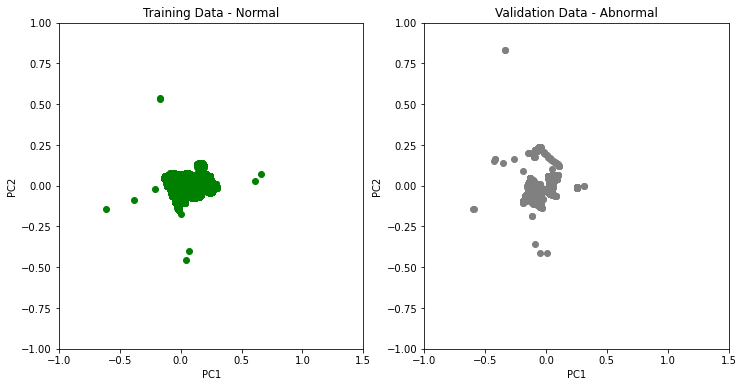

In [30]:
# Plot PC1 vs PC2 for training & test sets
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:, 0], X_train_PCA.loc[:, 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-1, 1.5)
ax0.set_ylim(-1, 1)
ax0.set_title('Training Data - Normal')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test1_PCA.loc[:, 0], X_test1_PCA.loc[:, 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-1, 1.5)
ax1.set_ylim(-1, 1)
ax1.set_title('Validation Data - Abnormal')

plt.show()

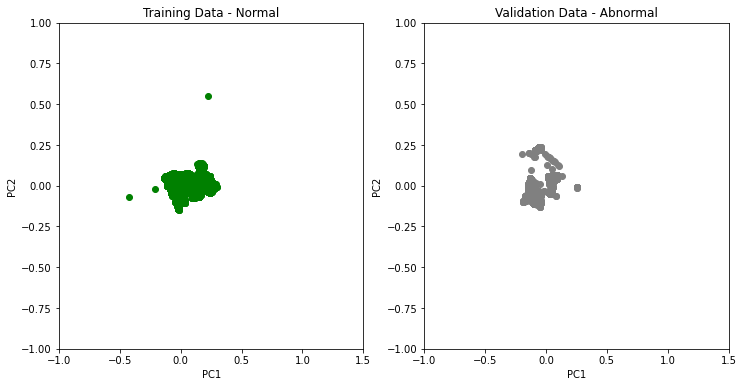

In [31]:
# Plot PC1 vs PC2 for training & test sets
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_test2_PCA.loc[:, 0], X_test2_PCA.loc[:, 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-1, 1.5)
ax0.set_ylim(-1, 1)
ax0.set_title('Training Data - Normal')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test3_PCA.loc[:, 0], X_test3_PCA.loc[:, 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-1, 1.5)
ax1.set_ylim(-1, 1)
ax1.set_title('Validation Data - Abnormal')

plt.show()

In [32]:
# Move on to calculate Mahalanobis Distance 
# This is a multivatiate distance from centroid calculation that
# can be useful for unsupervised anomaly detection
data_train = np.array(X_train_PCA.values)
data_test1 = np.array(X_test1_PCA.values)
data_test2 = np.array(X_test2_PCA.values)
data_test3 = np.array(X_test3_PCA.values)

cov_matrix = np.cov(data_train, rowvar = False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Mean of each column: PC1, PC2 (it should be very close to zero)
mean_distr = data_train.mean(axis = 0) # axis=0 means that average is computed per column
np.set_printoptions(precision = 3, suppress = False)
print('Mean distr', mean_distr)

# Mahalanobis Distance calculation
dist_test1 = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test1, verbose=False)
dist_test2 = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test2, verbose=False)
dist_test3 = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test3, verbose=False)
dist_train = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

print("Minimum & maximum MD in training set:", min(dist_train), max(dist_train))
print("Minimum & maximum MD in test set 1  :", min(dist_test1), max(dist_test1))
print("Minimum & maximum MD in test set 2  :", min(dist_test2), max(dist_test2))
print("Minimum & maximum MD in test set 3  :", min(dist_test3), max(dist_test3))

threshold = pdm.MD_threshold(dist_train, extreme = True) # extreme = True; 2x mean of incoming data
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold))

Mean distr [ 7.630e-17 -4.469e-17  6.394e-17  3.264e-17]
Minimum & maximum MD in training set: 0.3052052409514849 83.62179436192514
Minimum & maximum MD in test set 1  : 0.5807916856548729 88.08226422654771
Minimum & maximum MD in test set 2  : 0.30922778010863616 109.60645280154392
Minimum & maximum MD in test set 3  : 0.5807671609020052 168.40924442830928
Threshold value for flagging an anomaly is 4.55


/Users/jasonpayne/opt/anaconda3/envs/pdm/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


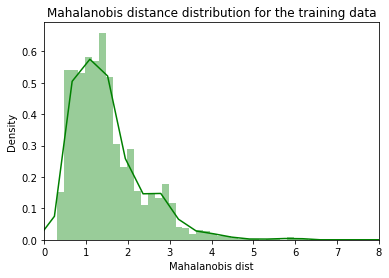

In [33]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 500, 
             kde = True, 
             color = 'green');
plt.xlim([0.0, 8])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the training data')
plt.show()

In [34]:
def prep_mahalonobis_data (dist_dat, thresh, pca_dat):
    # Prepare test data for visualization
    dat = pd.DataFrame()
    dat['Mob dist'] = dist_dat
    dat['Thresh'] = thresh
    dat['Anomaly'] = dat['Mob dist'] > dat['Thresh']
    dat.index = pca_dat.index
    dat['timestamp'] = dat.index

    n_outliers = dat[dat['Anomaly'] == True].shape[0]
    print("There are", n_outliers, "anomalies in the test set out of", dat.shape[0], "points")
    print("Corresponding to " + str(round(100*(n_outliers / dat.shape[0]), 2)) + '%')

    return(dat)

In [35]:
# Prepare training data for visualization
# If Mahalonobis distance is above threshold: Flag as anomaly
anomaly_train = pdm.prep_mahalonobis_data(dist_train, threshold, X_train_PCA)
anomaly1 = pdm.prep_mahalonobis_data(dist_test1, threshold, X_test1_PCA)
anomaly2 = pdm.prep_mahalonobis_data(dist_test2, threshold, X_test2_PCA)
anomaly3 = pdm.prep_mahalonobis_data(dist_test3, threshold, X_test3_PCA)

There are 228 anomalies in the test set out of 34108 points
> Corresponding to 0.67%
There are 5856 anomalies in the test set out of 9392 points
> Corresponding to 62.35%
There are 70 anomalies in the test set out of 11478 points
> Corresponding to 0.61%
There are 1890 anomalies in the test set out of 3022 points
> Corresponding to 62.54%


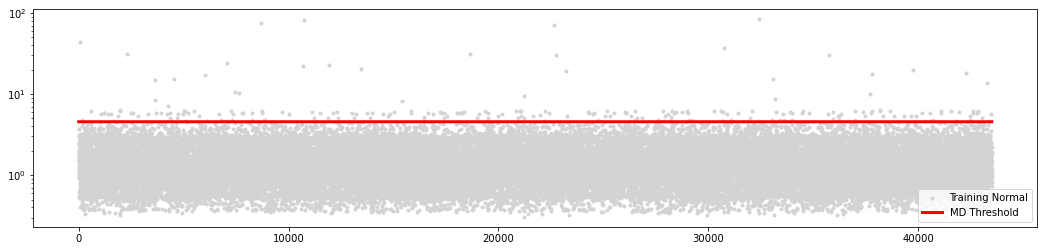

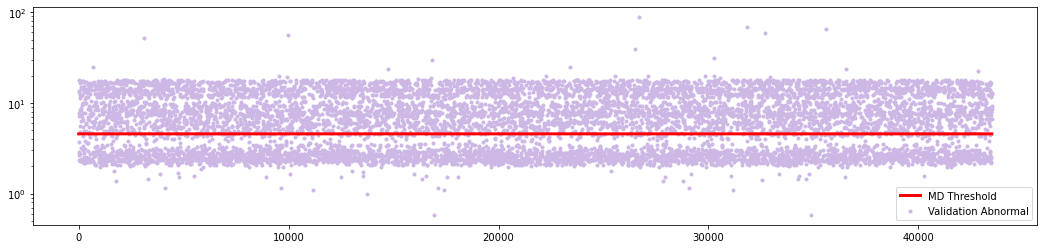

In [36]:
# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
ax.scatter(anomaly_train['timestamp'], anomaly_train['Mob dist'], color = 'lightgrey', marker = '.', zorder = 1, label = 'Training Normal')
ax.plot(anomaly_train['timestamp'], anomaly_train['Thresh'], color = 'red', marker = None, linewidth=3, zorder = 2, label = 'MD Threshold')
#ax.scatter(anomaly1['timestamp'], anomaly1['Mob dist'], color = 'orange', marker = '.', zorder = 3, label = 'Boundary Zones')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
plt.show()

# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
#ax.scatter(anomaly_train['timestamp'], anomaly_train['Mob dist'], color = 'lightgrey', marker = '.', zorder = 1, label = 'Normal')
ax.plot(anomaly1['timestamp'], anomaly1['Thresh'], color = 'red', marker = None, zorder = 2, linewidth=3, label = 'MD Threshold')
ax.scatter(anomaly1['timestamp'], anomaly1['Mob dist'], color = '#CCB7E5', marker = '.', zorder = 1, label = 'Validation Abnormal')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
plt.show()

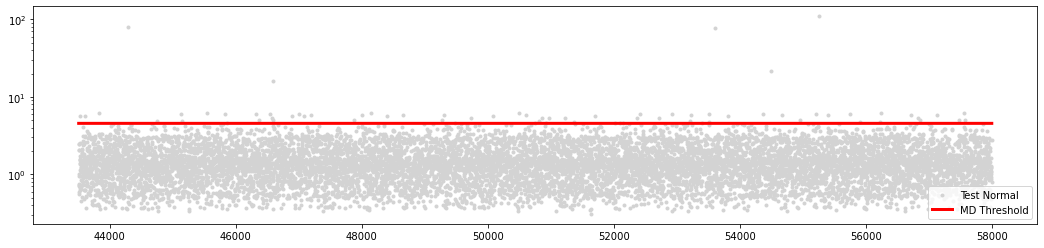

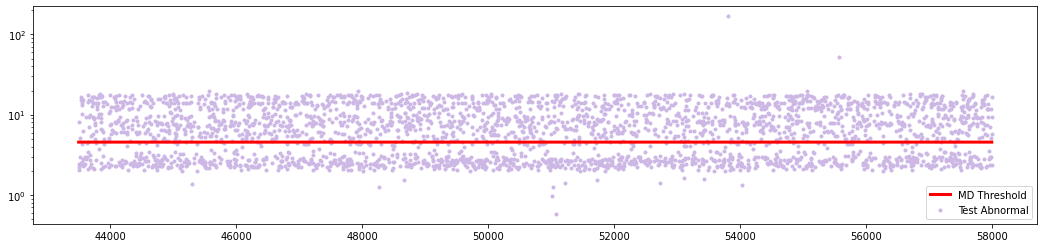

In [37]:
# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
ax.scatter(anomaly2['timestamp'], anomaly2['Mob dist'], color = 'lightgrey', marker = '.', zorder = 1, label = 'Test Normal')
ax.plot(anomaly2['timestamp'], anomaly2['Thresh'], color = 'red', marker = None, linewidth=3, zorder = 2, label = 'MD Threshold')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
plt.show()

# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
ax.plot(anomaly3['timestamp'], anomaly3['Thresh'], color = 'red', marker = None, zorder = 2, linewidth=3, label = 'MD Threshold')
ax.scatter(anomaly3['timestamp'], anomaly3['Mob dist'], color = '#CCB7E5', marker = '.', zorder = 1, label = 'Test Abnormal')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
plt.show()

### Robust Principle Component Analysis (PCA)

In [38]:
pca_r = PCA(n_components = n_comps, svd_solver = 'full')
df_test.drop('id', axis = 1, inplace = True)
df_test

,rad01,rad02,rad03,rad04,rad05,rad06,rad07,rad08
0,0.487167,0.468750,0.507015,0.291667,0.513210,0.477124,0.707865,0.675241
1,0.487167,0.585938,0.507015,0.384615,0.512654,0.575163,0.637239,0.578778
2,0.487065,0.531250,0.506114,0.381410,0.512802,0.568627,0.630819,0.575563
3,0.488076,0.453125,0.507015,0.368590,0.512728,0.477124,0.626003,0.591640
4,0.487369,0.476562,0.507015,0.387821,0.512580,0.483660,0.611557,0.575563
...,...,...,...,...,...,...,...,...
14495,0.487167,0.492188,0.507015,0.243590,0.511728,0.339869,0.759230,0.758842
14496,0.487167,0.468750,0.507015,0.269231,0.513729,0.483660,0.730337,0.694534
14497,0.487167,0.437500,0.507015,0.320513,0.511987,0.457516,0.670947,0.639871
14498,0.487167,0.640625,0.507015,0.330128,0.512210,0.745098,0.703050,0.604502


In [39]:
# Compute all PCA components for the training set
L_train, S_train = pdm.R_pca(df_norm_train).fit()
X_train_PCA = pca_r.fit_transform(L_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
RPCA_count_train_norm = len(X_train_PCA)

# Project the test data onto the PCA space
L_test1, S_test1 = pdm.R_pca(df_abnorm_train).fit()
X_test1_PCA = pca_r.transform(L_test1)
X_test1_PCA = pd.DataFrame(X_test1_PCA)
RPCA_count_train_abnorm = len(X_test1_PCA)

L_test2, S_test2 = pdm.R_pca(df_test).fit()
X_test2_PCA = pca_r.transform(L_test2)
X_test2_PCA = pd.DataFrame(X_test2_PCA)
RPCA_count_test = len(X_test2_PCA)

#L_test3, S_test3 = pdm.R_pca(df_abnorm_test).fit()
#X_test3_PCA = pca.transform(L_test3)
#X_test3_PCA = pd.DataFrame(X_test3_PCA)
#X_test3_PCA.index = df_abnorm_test.index
#RPCA_count_test_abnorm = len(X_test3_PCA)

iteration: 1, error: 0.5208222864723215
iteration: 100, error: 0.0065156817756406304
iteration: 200, error: 0.0034210453568610205
iteration: 300, error: 0.001208961117353208
iteration: 400, error: 0.00045547733244509226
iteration: 500, error: 0.00018498470676464273
iteration: 600, error: 0.0001292696790589403
iteration: 700, error: 6.939149719751185e-05
iteration: 800, error: 4.791467937763366e-05
iteration: 900, error: 3.857141914464569e-05
iteration: 1000, error: 3.155398194166055e-05
iteration: 1, error: 0.578320344698833
iteration: 100, error: 0.002854310684094612
iteration: 200, error: 0.0017130288492593132
iteration: 300, error: 0.0009013622633148907
iteration: 400, error: 0.0006500981402727947
iteration: 500, error: 0.00045379082318572627
iteration: 600, error: 0.0004112363680485204
iteration: 700, error: 0.0002869347601306619
iteration: 800, error: 0.00019941293937832558
iteration: 900, error: 0.00015091792482471714
iteration: 1000, error: 0.0001005731239431944
iteration: 1, er

In [40]:
print(PCA_count_train_norm, RPCA_count_train_norm)
print(PCA_count_train_abnorm, RPCA_count_train_abnorm)

34108 34108
9392 9392


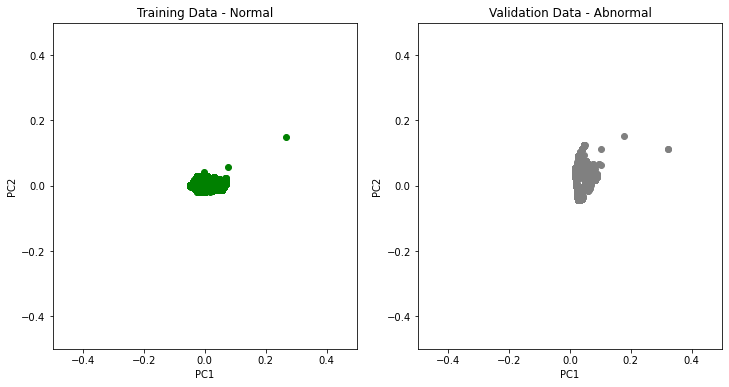

In [41]:
# Plot PC1 vs PC2 for training & test sets
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:, 0], X_train_PCA.loc[:, 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-0.5, 0.5)
ax0.set_ylim(-0.5, 0.5)
ax0.set_title('Training Data - Normal')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test1_PCA.loc[:, 0], X_test1_PCA.loc[:, 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_title('Validation Data - Abnormal')

plt.show()

In [42]:
X_test2_PCA['state'] = df_test_scaled['state']

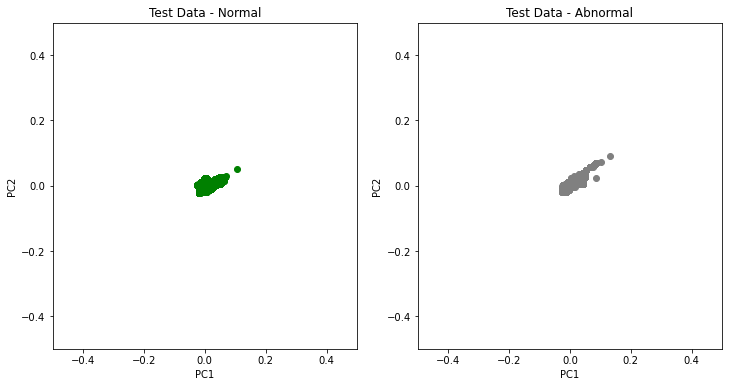

In [43]:
# Plot PC1 vs PC2 for training & test sets
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_test2_PCA.loc[X_test2_PCA['state'] == 'Normal', 0], X_test2_PCA.loc[X_test2_PCA['state'] == 'Normal', 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-0.5, 0.5)
ax0.set_ylim(-0.5, 0.5)
ax0.set_title('Test Data - Normal')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test2_PCA.loc[X_test2_PCA['state'] == 'Anomaly', 0], X_test2_PCA.loc[X_test2_PCA['state'] == 'Anomaly', 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_title('Test Data - Abnormal')

plt.show()

In [44]:
# Move on to calculate Mahalanobis Distance 
# This is a multivatiate distance from centroid calculation that
# can be useful for unsupervised anomaly detection
data_train = np.array(X_train_PCA.values)
data_test1 = np.array(X_test1_PCA.values)
data_test2 = np.array(X_test2_PCA.loc[X_test2_PCA['state'] == 'Normal',:].drop('state', axis = 1).values)
data_test3 = np.array(X_test2_PCA.loc[X_test2_PCA['state'] == 'Anomaly',:].drop('state', axis = 1).values)

cov_matrix = np.cov(data_train, rowvar = False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Mean of each column: PC1, PC2 (it should be very close to zero)
mean_distr = data_train.mean(axis = 0) # axis=0 means that average is computed per column
np.set_printoptions(precision = 3, suppress = False)
print('Mean distr', mean_distr)

# Mahalanobis Distance calculation
dist_train = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
dist_test1 = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test1, verbose=False)
dist_test2 = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test2, verbose=False)
dist_test3 = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test3, verbose=False)

print("Minimum & maximum MD in training set:", min(dist_train), max(dist_train))
print("Minimum & maximum MD in test set 1  :", min(dist_test1), max(dist_test1))
print("Minimum & maximum MD in test set 2  :", min(dist_test2), max(dist_test2))
print("Minimum & maximum MD in test set 3  :", min(dist_test3), max(dist_test3))

threshold = pdm.MD_threshold(dist_train, extreme = True) # extreme = True; 2x mean of incoming data
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold))

Mean distr [-1.274e-14 -2.326e-15 -1.757e-14 -1.907e-14]
Minimum & maximum MD in training set: 0.22690899150140237 156.7495943250656
Minimum & maximum MD in test set 1  : 50.37445245722612 327.524953795773
Minimum & maximum MD in test set 2  : 1.0660929206285747 40.69304673248478
Minimum & maximum MD in test set 3  : 4.8984253628454555 90.79109155501155
Threshold value for flagging an anomaly is 5.20


/Users/jasonpayne/opt/anaconda3/envs/pdm/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


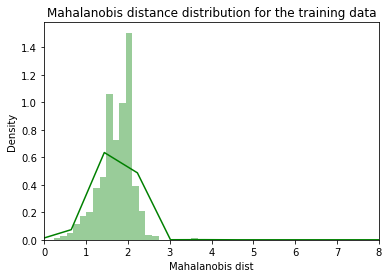

In [45]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 1000, 
             kde = True, 
             color = 'green');
plt.xlim([0.0, 8])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the training data')
plt.show()

In [46]:
# Prepare training data for visualization
# If Mahalonobis distance is above threshold: Flag as anomaly
anomaly_train = pdm.prep_mahalonobis_data(dist_train, threshold, X_train_PCA)
anomaly1 = pdm.prep_mahalonobis_data(dist_test1, threshold, X_test1_PCA)
anomaly2 = pdm.prep_mahalonobis_data(dist_test2, threshold, X_test2_PCA.loc[X_test2_PCA['state'] == 'Normal',:])
anomaly3 = pdm.prep_mahalonobis_data(dist_test3, threshold, X_test2_PCA.loc[X_test2_PCA['state'] == 'Anomaly',:])

There are 8 anomalies in the test set out of 34108 points
> Corresponding to 0.02%
There are 9392 anomalies in the test set out of 9392 points
> Corresponding to 100.0%
There are 8927 anomalies in the test set out of 11478 points
> Corresponding to 77.77%
There are 3016 anomalies in the test set out of 3022 points
> Corresponding to 99.8%


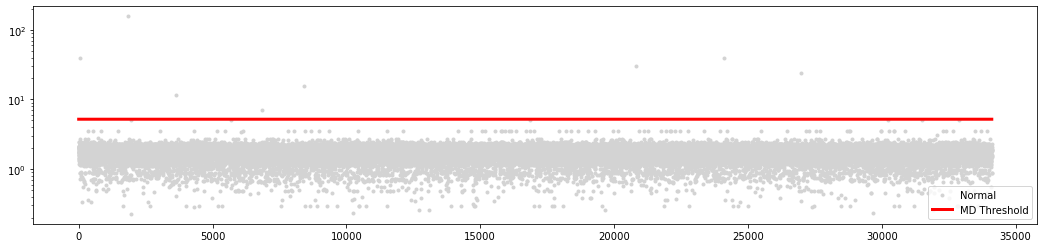

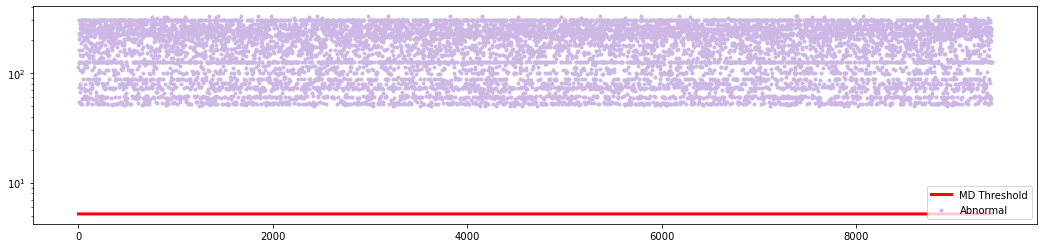

In [47]:
# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
ax.scatter(anomaly_train['timestamp'], anomaly_train['Mob dist'], color = 'lightgrey', marker = '.', zorder = 1, label = 'Normal')
ax.plot(anomaly_train['timestamp'], anomaly_train['Thresh'], color = 'red', marker = None, linewidth=3, zorder = 2, label = 'MD Threshold')
#ax.scatter(anomaly1['timestamp'], anomaly1['Mob dist'], color = 'orange', marker = '.', zorder = 3, label = 'Boundary Zones')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
plt.show()

# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
#ax.scatter(anomaly_train['timestamp'], anomaly_train['Mob dist'], color = 'lightgrey', marker = '.', zorder = 1, label = 'Normal')
ax.plot(anomaly1['timestamp'], anomaly1['Thresh'], color = 'red', marker = None, zorder = 2, linewidth=3, label = 'MD Threshold')
ax.scatter(anomaly1['timestamp'], anomaly1['Mob dist'], color = '#CCB7E5', marker = '.', zorder = 1, label = 'Abnormal')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
plt.show()

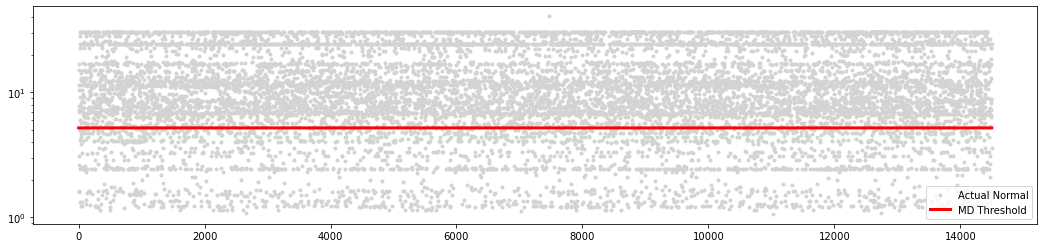

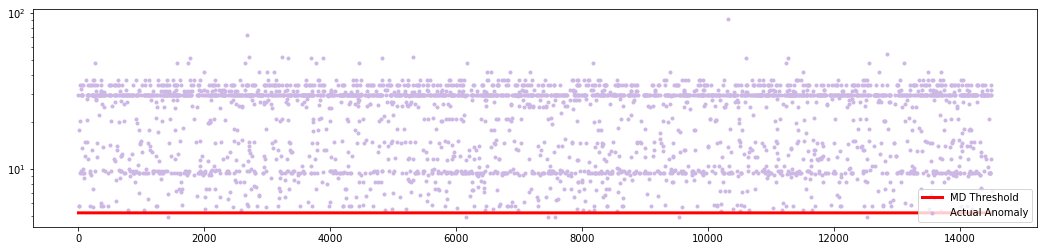

In [48]:
# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
ax.scatter(anomaly2['timestamp'], anomaly2['Mob dist'], color = 'lightgrey', marker = '.', zorder = 1, label = 'Actual Normal')
ax.plot(anomaly2['timestamp'], anomaly2['Thresh'], color = 'red', marker = None, linewidth=3, zorder = 2, label = 'MD Threshold')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
plt.show()

# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
ax.plot(anomaly3['timestamp'], anomaly3['Thresh'], color = 'red', marker = None, zorder = 2, linewidth=3, label = 'MD Threshold')
ax.scatter(anomaly3['timestamp'], anomaly3['Mob dist'], color = '#CCB7E5', marker = '.', zorder = 1, label = 'Actual Anomaly')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
plt.show()